<a href="https://colab.research.google.com/github/Aditya-founder/Selection/blob/main/iot_gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import os
import tensorflow as tf
import keras
from sklearn.preprocessing import normalize, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import urllib
from sklearn.metrics import accuracy_score


In [2]:
gestures = ['down_to_up', 'forward_clockwise', 'left_fall', 'up_clockwise', 'up_anticlockwise', 'left_to_right', 'right_to_left', 'forward_fall']

In [3]:
df = pd.read_csv('gesture60_8_.csv')

In [4]:
df[df.columns[:-1]] = normalize(df[df.columns[:-1]])
df = df.sample(frac=1, random_state=13).reset_index(drop = True)
df

,1,2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,Gesture
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,0.024808,0.002097,-0.001888,0.000016,0.090347,-0.011931,0.024808,0.002097,-0.001888,forward_fall
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,0.000335,-0.000426,-0.000641,0.004812,0.097926,0.013797,0.000335,-0.000426,-0.000641,right_to_left
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,0.000269,0.000499,-0.000634,0.003202,0.099697,-0.008268,-0.000968,-0.000035,-0.000430,down_to_up
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.001582,0.000178,-0.000643,-0.007194,0.099899,0.022321,-0.001582,0.000178,-0.000643,left_to_right
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,0.000294,-0.001089,-0.000150,-0.000919,0.089743,-0.005857,0.000294,-0.001089,-0.000150,down_to_up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.012845,0.098365,0.013678,-0.000165,-0.000197,0.000305,0.012250,0.099106,0.013836,-0.000165,...,0.000217,0.000280,-0.000531,-0.003093,0.097247,0.024952,0.000217,0.000280,-0.000531,left_to_right
473,-0.002079,0.080596,0.006062,0.000606,0.000420,-0.000667,-0.002528,0.080146,0.005661,0.000606,...,0.000380,0.000523,0.001311,0.000933,0.080889,0.000381,0.000380,0.000523,0.001311,left_fall
474,0.011863,0.095148,0.028367,-0.000533,-0.000350,-0.000925,0.011118,0.095004,0.028283,-0.000533,...,-0.001097,0.001230,-0.003628,-0.007168,0.095688,0.020857,-0.001097,0.001230,-0.003628,right_to_left
475,0.007047,0.093727,0.008762,0.000426,0.000409,-0.000170,0.006576,0.094048,0.008969,0.000426,...,0.016682,-0.000295,-0.002204,0.006072,0.094140,-0.005092,0.001702,0.000295,-0.000190,forward_fall


In [5]:
data = pd.DataFrame(df)

In [6]:
col = ['ax','ay','az','gx','gy','gz']*100
col.append('Gesture')
data.columns = col

In [7]:
data_dict = {}

def extract(gesture, data_dict):
    k = data[data["Gesture"] == gesture].shape[0]
    for j in range(0, k):
        if j == 0:
            # Initialize the dictionary entry with the first slice of data
            data_dict[gesture] = data[data['Gesture'] == gesture].iloc[0:1, 0:6]
        else:
            data_dict[gesture] = pd.concat(
                [data_dict[gesture], data[data['Gesture'] == gesture].iloc[j:j+1, 0:6]],
                ignore_index=True
            )
        # Iterate through the rest of the data in steps of 6
        for i in range(6, 600, 6):
            data_dict[gesture] = pd.concat(
                [data_dict[gesture], data[data['Gesture'] == gesture].iloc[j:j+1, i:i+6]],
                ignore_index=True
            )

for i in gestures:
    extract(i, data_dict)


In [8]:
def visualize(type, gesture):
    for i in gestures:
        title = type.upper()+' for \"'+i.upper()+'\" gesture'
        plt.title(title)
        if type == 'acceleration':
            index = range(1, len(data_dict[i]['ax']) + 1)
            plt.plot(index, data_dict[i]['ax'], 'g.', label='x', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['ay'], 'b.', label='y', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['az'], 'r.', label='z', linestyle='solid', marker=',')

        if type == 'gyro':
            index = range(1, len(data_dict[i]['ax']) + 1)
            plt.plot(index, data_dict[i]['gx'], 'g.', label='x', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['gy'], 'b.', label='y', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['gz'], 'r.', label='z', linestyle='solid', marker=',')

        plt.legend()
        plt.show()

<ipython-input-8-f5143b172488>:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['gx'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-8-f5143b172488>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['gy'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-8-f5143b172488>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['gz'], 'r.', label='z', linestyle='solid', marker=',')


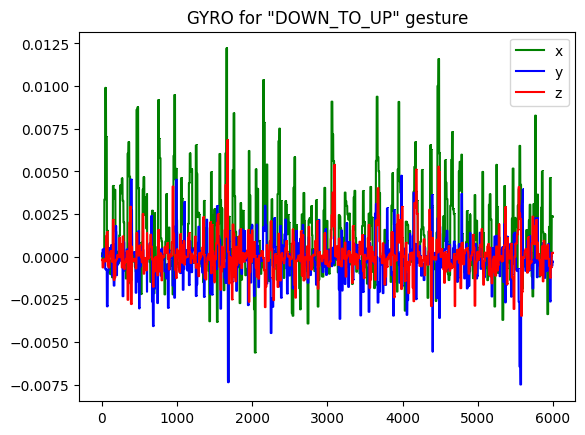

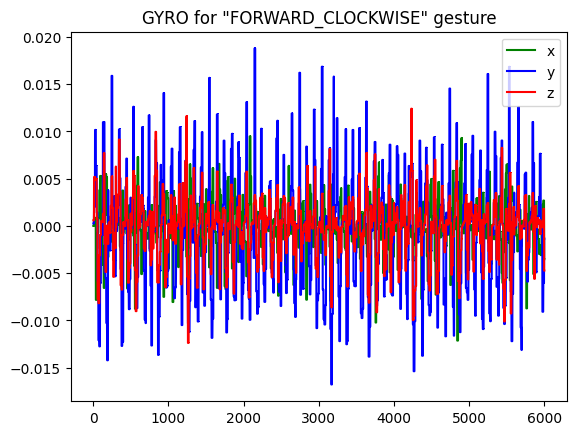

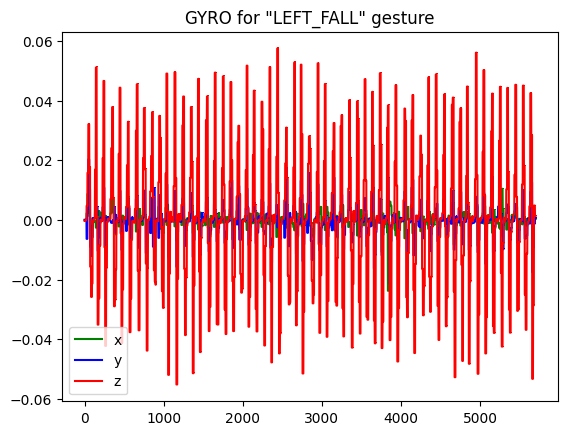

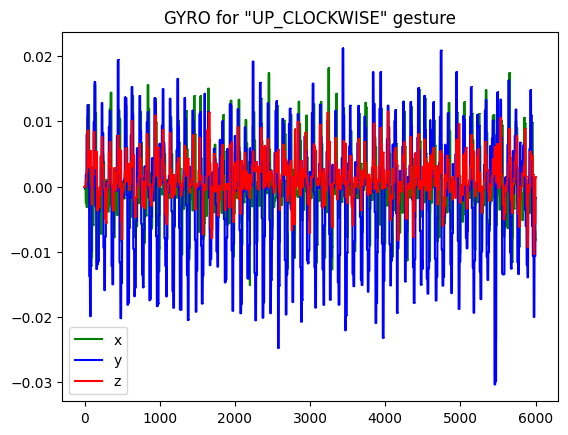

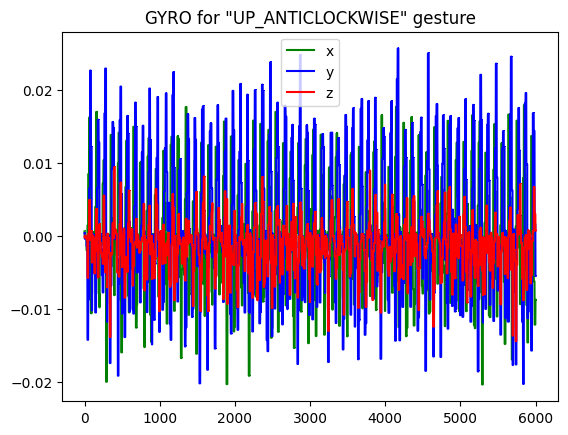

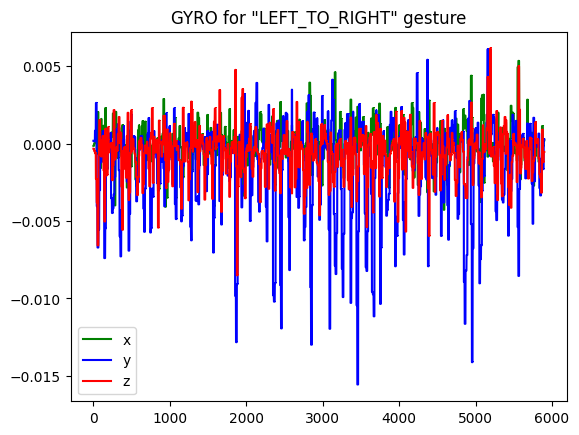

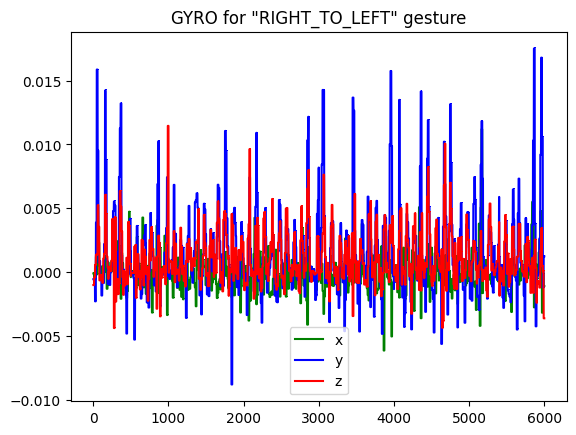

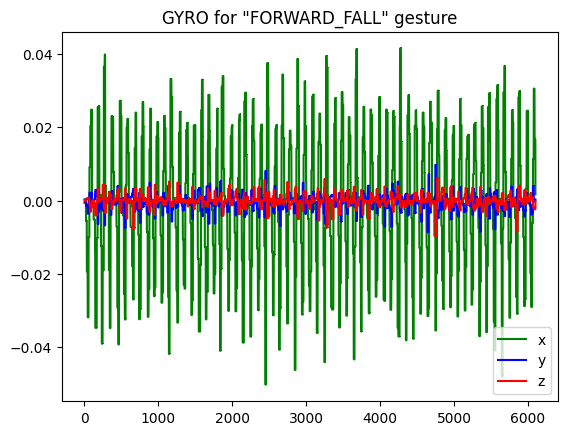

In [9]:
visualize('gyro', gestures)

<ipython-input-8-f5143b172488>:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['ax'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-8-f5143b172488>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['ay'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-8-f5143b172488>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, data_dict[i]['az'], 'r.', label='z', linestyle='solid', marker=',')


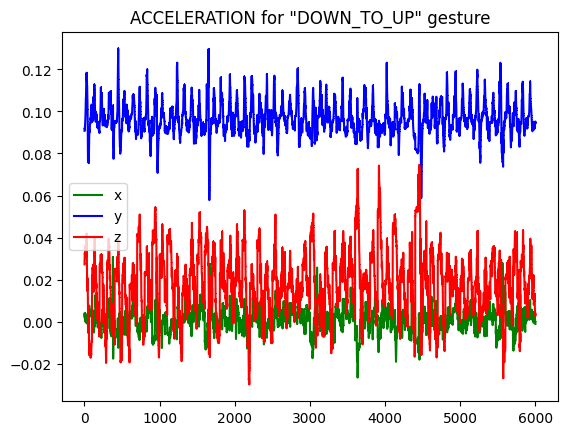

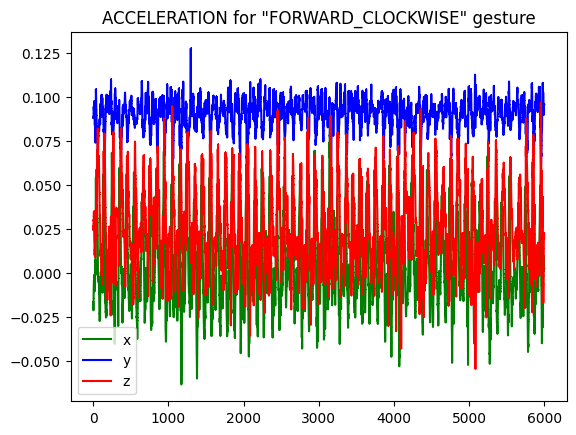

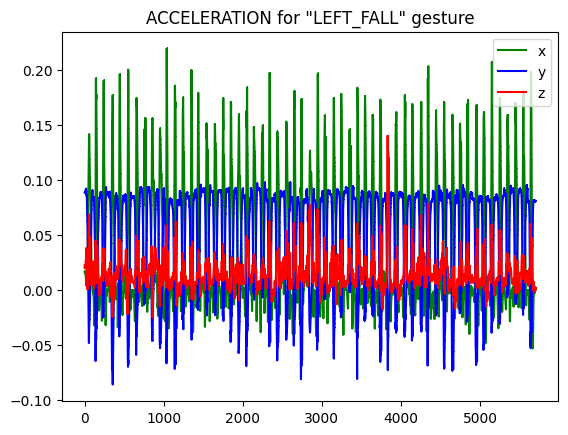

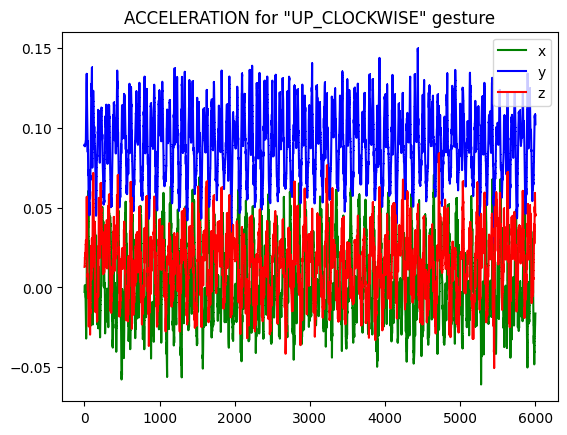

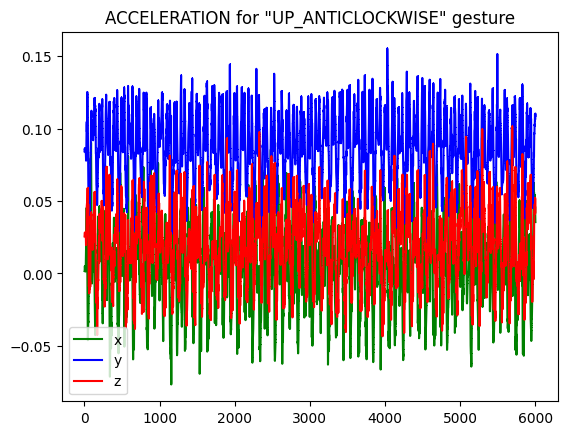

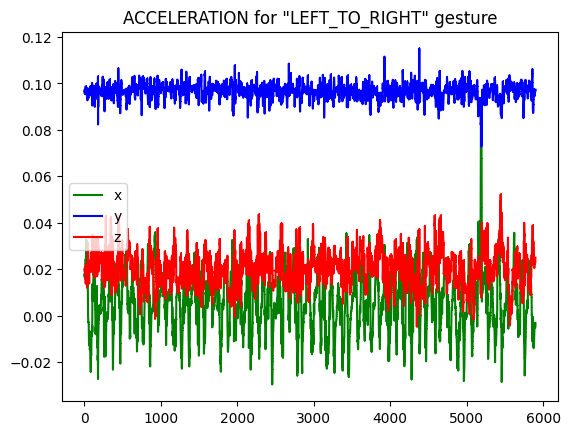

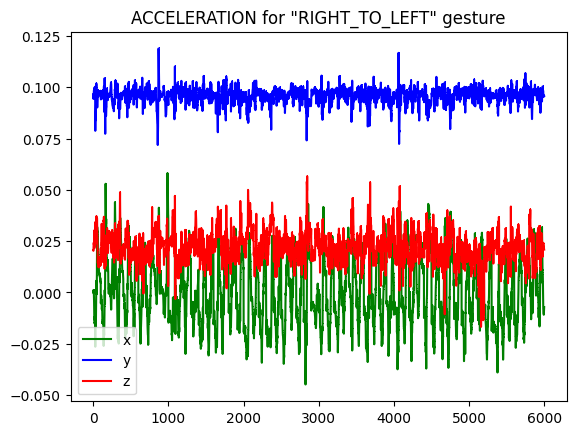

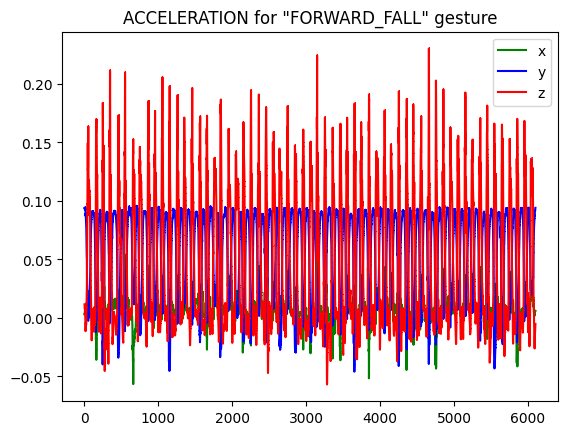

In [10]:
visualize('acceleration', gestures)

In [11]:

outlier = data_dict['left_to_right'][data_dict['left_to_right']['ax'] > 0.06]
print("Outliers:")
print(outlier)

# Get unique indices of the outliers
outlier_index = outlier.index.unique().values
print("Outlier indices:", outlier_index)

# Ensure indices are aligned
common_indices = df.index.intersection(outlier_index)
if len(common_indices) == 0:
    print("No common indices found. Ensure indices are aligned.")
else:
    # Drop rows with the outlier indices and reset the DataFrame index
    df = df.drop(common_indices).reset_index(drop=True)
    print("Updated DataFrame:")
    print(df)


Outliers:
            ax        ay        az        gx        gy        gz
5184  0.061794  0.082124  0.010391  0.000595  0.000707 -0.000647
5185  0.073243  0.082884  0.017196  0.000595  0.000707 -0.000647
5186  0.086864  0.083204  0.017766  0.000595  0.000707 -0.000647
5187  0.085522  0.082052  0.012932  0.000595  0.000707 -0.000647
5188  0.085581  0.077136  0.009168  0.000595  0.000707 -0.000647
5189  0.085581  0.077136  0.009168 -0.000697 -0.000800  0.006152
5190  0.088123  0.084677  0.007743 -0.000697 -0.000800  0.006152
5191  0.084608  0.080722  0.012517 -0.000697 -0.000800  0.006152
5192  0.080439  0.075770  0.015783 -0.000697 -0.000800  0.006152
5193  0.079596  0.072789  0.021483 -0.000697 -0.000800  0.006152
5194  0.078682  0.078228  0.029547 -0.000697 -0.000800  0.006152
5195  0.067530  0.080188  0.034677 -0.000697 -0.000800  0.006152
Outlier indices: [5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195]
No common indices found. Ensure indices are aligned.


In [12]:
df

,1,2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,Gesture
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,0.024808,0.002097,-0.001888,0.000016,0.090347,-0.011931,0.024808,0.002097,-0.001888,forward_fall
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,0.000335,-0.000426,-0.000641,0.004812,0.097926,0.013797,0.000335,-0.000426,-0.000641,right_to_left
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,0.000269,0.000499,-0.000634,0.003202,0.099697,-0.008268,-0.000968,-0.000035,-0.000430,down_to_up
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.001582,0.000178,-0.000643,-0.007194,0.099899,0.022321,-0.001582,0.000178,-0.000643,left_to_right
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,0.000294,-0.001089,-0.000150,-0.000919,0.089743,-0.005857,0.000294,-0.001089,-0.000150,down_to_up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.012845,0.098365,0.013678,-0.000165,-0.000197,0.000305,0.012250,0.099106,0.013836,-0.000165,...,0.000217,0.000280,-0.000531,-0.003093,0.097247,0.024952,0.000217,0.000280,-0.000531,left_to_right
473,-0.002079,0.080596,0.006062,0.000606,0.000420,-0.000667,-0.002528,0.080146,0.005661,0.000606,...,0.000380,0.000523,0.001311,0.000933,0.080889,0.000381,0.000380,0.000523,0.001311,left_fall
474,0.011863,0.095148,0.028367,-0.000533,-0.000350,-0.000925,0.011118,0.095004,0.028283,-0.000533,...,-0.001097,0.001230,-0.003628,-0.007168,0.095688,0.020857,-0.001097,0.001230,-0.003628,right_to_left
475,0.007047,0.093727,0.008762,0.000426,0.000409,-0.000170,0.006576,0.094048,0.008969,0.000426,...,0.016682,-0.000295,-0.002204,0.006072,0.094140,-0.005092,0.001702,0.000295,-0.000190,forward_fall


In [13]:
df.to_csv('gesture60_8_normalized.csv', index = False)

In [14]:
y_df = pd.get_dummies(df.Gesture)[gestures]
print(y_df)
print(np.array(y_df)[0].shape)

     down_to_up  forward_clockwise  left_fall  up_clockwise  up_anticlockwise  \
0         False              False      False         False             False   
1         False              False      False         False             False   
2          True              False      False         False             False   
3         False              False      False         False             False   
4          True              False      False         False             False   
..          ...                ...        ...           ...               ...   
472       False              False      False         False             False   
473       False              False       True         False             False   
474       False              False      False         False             False   
475       False              False      False         False             False   
476       False               True      False         False             False   

     left_to_right  right_t

In [15]:
df = pd.concat([df, y_df], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,600,Gesture,down_to_up,forward_clockwise,left_fall,up_clockwise,up_anticlockwise,left_to_right,right_to_left,forward_fall
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,-0.001888,forward_fall,False,False,False,False,False,False,False,True
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,-0.000641,right_to_left,False,False,False,False,False,False,True,False
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,-0.000430,down_to_up,True,False,False,False,False,False,False,False
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.000643,left_to_right,False,False,False,False,False,True,False,False
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,-0.000150,down_to_up,True,False,False,False,False,False,False,False


In [16]:
train_count = int(0.8*len(df))
test_count = len(df) - train_count
print(train_count, test_count)

x_train, y_train = np.array(df)[:train_count, :600].astype('float32'), np.array(df)[:train_count, -(len(gestures)):].astype('int64')
x_test, y_test = np.array(df)[train_count:, :600].astype('float32'), np.array(df)[train_count:, -(len(gestures)):].astype('int64')

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

381 96
(381, 600) (381, 8) (96, 600) (96, 8)


In [17]:
x_train[0].shape

(600,)

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation="relu", input_shape = (600,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(len(gestures), activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       307,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 382,152 (1.46 MB)

 Trainable params: 382,152 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs = 16, batch_size = 8)

Epoch 1/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3872 - loss: 1.8508
Epoch 2/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8630 - loss: 0.5661
Epoch 3/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9665 - loss: 0.1729
Epoch 4/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9928 - loss: 0.0769
Epoch 5/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9996 - loss: 0.0381
Epoch 6/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9996 - loss: 0.0158
Epoch 7/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9805 - loss: 0.0426
Epoch 8/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9952 - loss: 0.0272
Epoch 9/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0064
Epoch 10/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 11/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0033
Epoch 12/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - lo

In [22]:
model.evaluate(x_test, y_test)
model.save('gesture_model1.h5')
print("size of the model:", os.path.getsize('gesture_model1.h5') / (1024 ), "KB")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9688 - loss: 0.3252 


size of the model: 4515.765625 KB


In [23]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(600,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(gestures), activation="softmax")
])
model2.summary()
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model2.fit(x_train, y_train, epochs = 16, batch_size = 8 , validation_data=(x_test, y_test) )
model2.evaluate(x_test, y_test)
# modle save
model2.save('gesture_model.h5')
print("size of the model:", os.path.getsize('gesture_model.h5') / (1024 ), "KB")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        76,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,704 (334.78 KB)

 Trainable params: 85,704 (334.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3754 - loss: 1.9712 - val_accuracy: 0.5625 - val_loss: 1.5274
Epoch 2/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6789 - loss: 1.2822 - val_accuracy: 0.9375 - val_loss: 0.7313
Epoch 3/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9422 - loss: 0.5981 - val_accuracy: 0.8438 - val_loss: 0.4589
Epoch 4/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.3507 - val_accuracy: 0.9375 - val_loss: 0.3208
Epoch 5/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9788 - loss: 0.1842 - val_accuracy: 0.9583 - val_loss: 0.2517
Epoch 6/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.1415 - val_accuracy: 0.9583 - val_loss: 0.2152
Epoch 7/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0858 - val_accuracy: 0.9271 - val_loss: 0.2327
Epoch 8/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss: 0.0601 - val_accuracy: 0.9583 - val_loss:

size of the model: 1031.0546875 KB


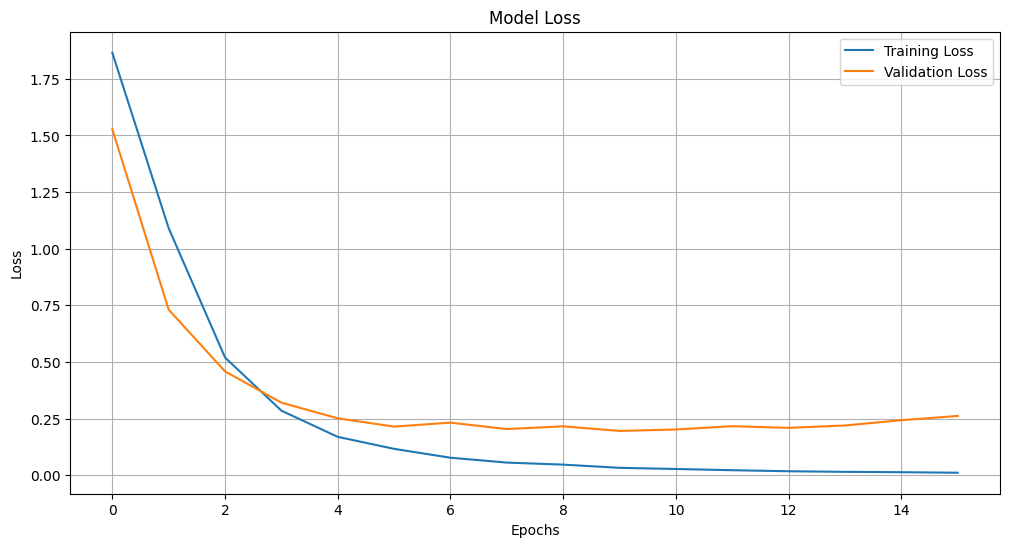

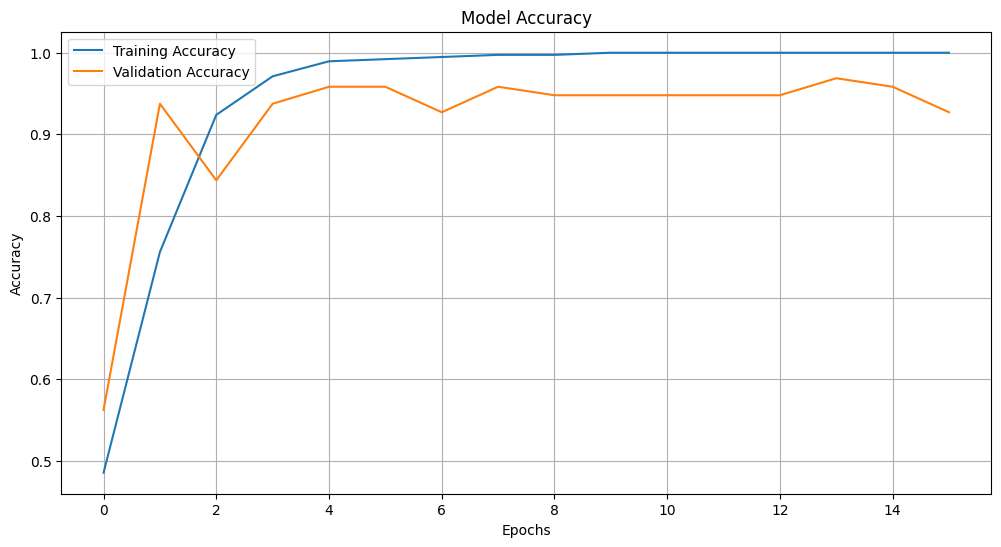

In [24]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(600,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(gestures), activation="softmax")
])
model3.summary()
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,              # Stop training if no improvement for 5 epochs
    restore_best_weights=True,  # Restore the best weights at the end of training
    verbose=1                # Print information when training stops
)

model_checkpoint = ModelCheckpoint(
    'best_gesture_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model with callbacks
history = model3.fit(
    x_train, y_train,
    epochs=16,
    batch_size=8,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
model3.evaluate(x_test, y_test)

# Save the final model (if needed)
model3.save('gesture_model_3.h5')
print("size of the model:", os.path.getsize('gesture_model_3.h5') / (1024 ), "KB")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │        76,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,704 (334.78 KB)

 Trainable params: 85,704 (334.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
25/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3208 - loss: 2.0135
Epoch 1: val_accuracy improved from -inf to 0.76042, saving model to best_gesture_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3828 - loss: 1.9488 - val_accuracy: 0.7604 - val_loss: 1.4088
Epoch 2/16
43/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 1.2317
Epoch 2: val_accuracy improved from 0.76042 to 0.94792, saving model to best_gesture_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 1.2050 - val_accuracy: 0.9479 - val_loss: 0.6782
Epoch 3/16
27/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8945 - loss: 0.6073 
Epoch 3: val_accuracy improved from 0.94792 to 0.97917, saving model to best_gesture_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8870 - loss: 0.5876 - val_accuracy: 0.9792 - val_loss: 0.4074
Epoch 4/16
26/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.3262  
Epoch 4: val_accuracy did not improve from 0.97917
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.3197 - val_accuracy: 0.9583 - val_loss: 0.2883
Epoch 5/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9889 - loss: 0.2141
Epoch 5: val_accuracy did not improve from 0.97917
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.2137 - val_accuracy: 0.9583 - val_loss: 0.2451
Epoch 6/16
40/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.1225
Epoch 6: val_accuracy did not improve from 0.97917
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9952 - loss: 0.1252 - val_accuracy: 0.9375 - val_loss: 0.2127
Epoch 7/16
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0982
Epoch 7: val_accuracy did not improve from 0.9791

size of the model: 1031.0546875 KB


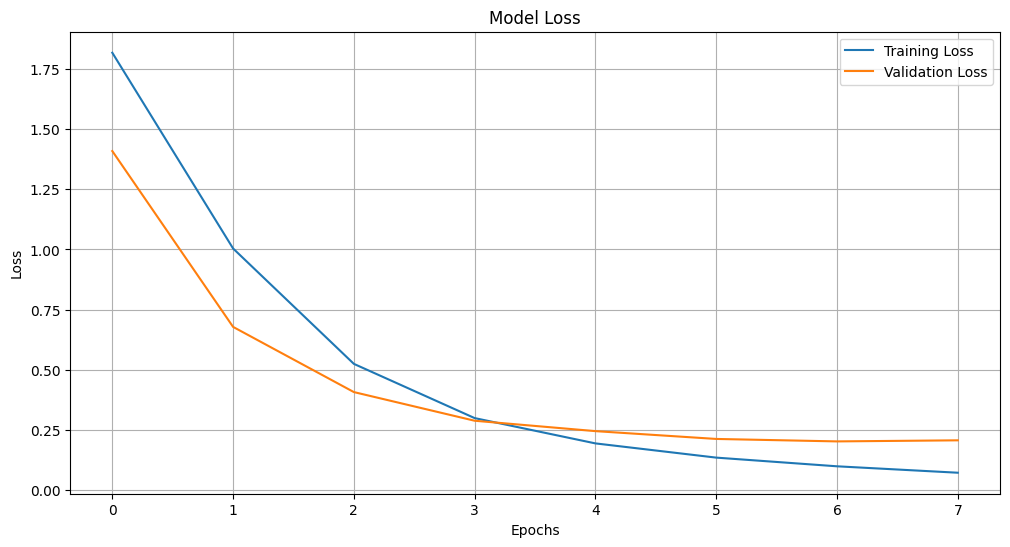

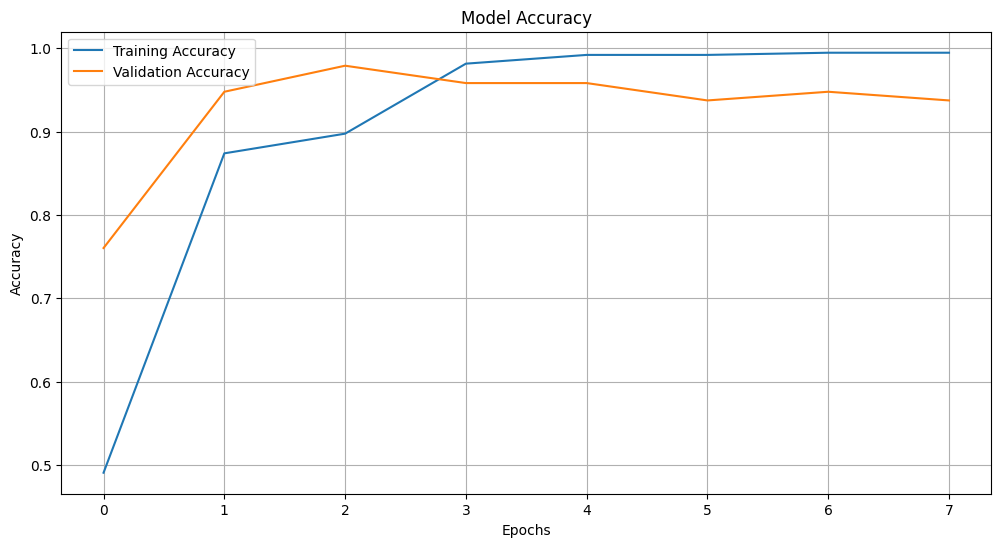

In [26]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model3)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
print(f"Converted model size: {len(tflite_model) / 1024:.2f} KB")
#  with converter.optimizations = [tf.lite.Optimize.DEFAULT] the model size is 88.02 kb KB
# without any optimization the model size is 336.89 KB



Saved artifact at '/tmp/tmpj9jf8x25'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 600), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  133832003019664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133832003017744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133832003018128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133832003018320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133832003018512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133832003018896: TensorSpec(shape=(), dtype=tf.resource, name=None)
Converted model size: 90.16 KB


In [28]:
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


In [29]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()


In [30]:
import numpy as np
from sklearn.metrics import accuracy_score

# Function to get confidence levels and calculate true positive and false positive metrics
def evaluate_model_with_metrics(interpreter, x_test, y_test, gestures):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    predictions = []

    for i in range(len(x_test)):
        input_data = x_test[i:i+1].astype("float32")
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predictions.append(np.argmax(output_data))

    y_test_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_classes, predictions)

    # Initialize arrays to store TP, FP, TN, FN
    true_positives = np.zeros(len(gestures))
    false_positives = np.zeros(len(gestures))
    true_negatives = np.zeros(len(gestures))
    false_negatives = np.zeros(len(gestures))

    # Calculate TP, FP, TN, FN for each gesture
    for i in range(len(gestures)):
        true_positives[i] = np.sum((y_test_classes == i) & (np.array(predictions) == i))
        false_positives[i] = np.sum((y_test_classes != i) & (np.array(predictions) == i))
        true_negatives[i] = np.sum((y_test_classes != i) & (np.array(predictions) != i))
        false_negatives[i] = np.sum((y_test_classes == i) & (np.array(predictions) != i))

    # Calculate Precision, Recall, and F1-Score for each class
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Calculate average metrics (macro-averaged)
    avg_precision = np.mean(precision)
    avg_recall = np.mean(recall)
    avg_f1_score = np.mean(f1_score)

    return accuracy, precision, recall, f1_score, avg_precision, avg_recall, avg_f1_score

# Example usage: Evaluate the TensorFlow Lite model
accuracy, precision, recall, f1_score, avg_precision, avg_recall, avg_f1_score = evaluate_model_with_metrics(interpreter, x_test, y_test, gestures)

# Print the metrics
print(f"TensorFlow Lite model accuracy: {accuracy * 100:.2f}%")
print("Precision for each gesture:", precision)
print("Recall for each gesture:", recall)
print("F1 Score for each gesture:", f1_score)
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1 Score: {avg_f1_score:.2f}")


TensorFlow Lite model accuracy: 97.92%
Precision for each gesture: [0.91666667 1.         1.         1.         1.         1.
 0.90909091 1.        ]
Recall for each gesture: [1.         1.         1.         1.         1.         0.84615385
 1.         1.        ]
F1 Score for each gesture: [0.95652174 1.         1.         1.         1.         0.91666667
 0.95238095 1.        ]
Average Precision: 0.98
Average Recall: 0.98
Average F1 Score: 0.98
